## Summer 2020 CX4641/CS7641 Homework 3

## Instructor: Dr. Mahdi Roozbahani

## Deadline: July 10th, Friday, 11:59 pm

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged on Piazza as part of the Q/A. However, all assignments should be done individually.


## Instructions for the assignment

- In this assignment, we have programming and writing questions.
- To switch between cell for code and for markdown, see the menu -> Cell -> Cell Type
- You could directly type the Latex equations in the markdown cell.
- Typing with Latex\markdown is required for all the written questions. Handwritten answers would not be accepted. 
- If a question requires a picture, you could use this syntax $"<img src="" style="width: 300px;"/>"$ to include them within your ipython notebook.
- Questions marked with <span style="color:blue">**[P]**</span> are programming only and should be submitted to the autograder. Questions marked with <span style="color:green">**[W]**</span> may required that you code a small function or generate plots, but should **NOT** be submitted to the autograder. It should be submitted on the writing portion of the assignment on gradescope
- The outline of the assignment is as follows:
    * Q1 [20 pts] > Naive Bayes classification. <span style="color:green">**[W]** items 1.1 </span>| <span style="color:blue">**[P]** items 1.2 </span>
    * Q2 [30 pts] > Image compression with PCA <span style="color:green">**[W]** 2.2 and 2.3 </span>| <span style="color:blue">**[P]** items 2.1 </span>
    * Q3 [Undergrad: 55+20 (bonus) pts| Grad: 75 pts] > Regression and regularization <span style="color:green">**[W]** items 3.2, 3.3, 3.4 and 3.5 </span>| <span style="color:blue">**[P]** items 3.1 </span>
    * Q4 [20 pts] > Understanding PCA <span style="color:green">**[W]** items 4.1 and 4.2 </span>| <span style="color:blue">**[P]** None </span>
    * Q5 [Bonus for all][30 pts] > Manifold learning with Isomap <span style="color:green">**[W]** items 5.2 </span>| <span style="color:blue">**[P]** items 5.1 </span>



## Using the autograder

- You will find two assignments on Gradescope that correspond to HW3: "HW3 - Programming" and "HW3 - Non-programming".
- You will submit your code for the autograder on "HW3 - Programming" in the following format:

    * nb.py
    * imgcompression.py
    * regression.py
    * isomap.py

- All you will have to do is to copy your implementations of the classes "NaiveBayes", "ImgCompression", "Regression", "Isomap" onto the respective files. We provided you different .py files and we added libraries in those files please DO NOT remove those lines and add your code after those lines. Note that these are the only allowed libraries that you can use for the homework.

- You are allowed to make as many submissions until the deadline as you like. Additionally, note that the autograder tests each function separately, therefore it can serve as a useful tool to help you debug your code if you are not sure of what part of your implementation might have an issue.

- **For the "HW3 - Non-programming" part, you will download your jupyter notbook as HTML, print it as a PDF from your browser and submit it on Gradescope. To download the notebook as html, click on "File" on the top left corner of this page and select "Download as > HTML". The non-programming part corresponds to Q2, Q3.3 (both your response and the generated images with your implementation) and Q4.2.**

In [1]:
import numpy as np
import json
from matplotlib import pyplot as plt
from sklearn.feature_extraction import text
from sklearn.datasets import load_boston, load_diabetes, load_digits, load_breast_cancer, load_iris, load_wine
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import floyd_warshall
%matplotlib inline

## 1. Naive Bayes Classification [20pts]

In Bayesian classification, we're interested in finding the probability of a label given some observed feature vector $x = [x_{1},.., x_{d}]$, which we can write as $P(y~|~{ x_{1},.., x_{d}})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

\begin{eqnarray} 
P(y~|~{ x_{1},.., x_{d}}) = \frac{P({ x_{1},.., x_{d}}~|~y)P(y)}{P({ x_{1},.., x_{d}})} 
\end{eqnarray}


The main assumption in Naive Bayes is that, given the label, the observed features are conditionally independent i.e. 

$$
P({ x_{1},.., x_{d}}~|~y) = P({x_{1}}~|~y) \times .. \times P({x_{d}}~|~y)    
$$

Therefore, we can rewrite Bayes rule as

\begin{eqnarray}
P(y~|~{ x_{1},.., x_{d}}) = \frac{P({x_{1}}~|~y) \times .. \times P({x_{d}}~|~y)P(y)}{P({ x_{1},.., x_{d}})}
\end{eqnarray}

### Training Naive Bayes
One way to train a Naive Bayes classifier is done using frequentist approach to calculate probability, which is simply going over the training data and calculating the frequency of different observations in the training set given different labels. For example,  
\begin{eqnarray}
P({x_{1}=i}~|~y=j) &=& \frac{P({x_{1}=i}, y=j)}{P(y=j)} =  \frac{\text{Number of times in training data } x_{1}=i \text{ and } y=j }{\text{Total number of times in training data } y=j}
\end{eqnarray}

### Testing Naive Bayes

During the testing phase, we try to estimate the probability of a label given an observed feature vector. We combine the probabilities computed from training data to estimate the probability of a given label. For example, if we are trying to decide between two labels $y_{1}$ and $y_{2}$, then we compute the ratio of the posterior probabilities for each label:

\begin{eqnarray}
\frac{P(y_{1}~|~ x_{1},.., x_{d})}{P(y_2~|~x_{1},.., x_{d})} = \frac{P(x_{1},.., x_{d}~|~y_{1})}{P(x_{1},.., x_{d}~|~y_{2})}\frac{P(y_1)}{P(y_2)}= \frac{P({x_{1}}~|~y_{1}) \times .. \times P({x_{d}}~|~y_{1})P(y_{1})}{P({x_{1}}~|~y_{2}) \times .. \times P({x_{d}}~|~y_{2})P(y_{2})}
\end{eqnarray}

All we need now is to compute $P(x_{1}|y_{i}),.., P(x_{d}~|~y_i)$ and $P(y_{i})$ for each label by pluging in the numbers we got during training. The label with the higher posterior probabilities is the one that is selected.

### 1.1 Supermarket [5pts] <span style="color:green">**[W]**</span>


A local supermarket specializing in breakfast cereals decides to analyze the buying patterns of its customers. They make a small survey asking 6 randomly chosen people their age (older or younger than 60 years) and which of the breakfast cereals (Cornflakes, Frosties, Sugar Puffs, Branflakes) they like. Each respondent provides a vector with entries 1 or 0 corresponding to whether they like or dislike the cereal. Thus a respondent with (1101) would like Cornflakes, Frosties and Branflakes, but not Sugar Puffs. The older than 60 years respondents provide the following data (1000), (1001), (1111), (0001). The younger than 60 years old respondents responded (0110), (1110). A new customer comes into the supermarket and says she only likes Frosties and Sugar Puffs. Using naive Bayes, Is the new customer older than 60?

### Answer:

The survey results for people >60 are:

| Cornflakes | Frosties | Sugar Puffs | Branflakes |
| --- | --- | --- | --- |
| 1 | 0 | 0 | 0 |
| 1 | 0 | 0 | 1 |
| 1 | 1 | 1 | 1 |
| 0 | 0 | 0 | 1 |

The survey results for people <60 are:

| Cornflakes | Frosties | Sugar Puffs | Branflakes |
| --- | --- | --- | --- |
| 0 | 1 | 1 | 0 |
| 1 | 1 | 1 | 0 |

We have the overall probabilities of being old or young as:
$$ P(Old) = \frac{2}{3}; P(Young) = \frac{1}{3} $$
From the above tables, we can derive the following maximum likelihood estimates given an old customer:
$$ P(C=1|Old) = \frac{3}{4}; P(F=1|Old) = \frac{1}{4}; P(S=1|Old) = \frac{1}{4}; P(B=1|Old) = \frac{3}{4} $$

Given a young customer, we get:
$$ P(C=1|Young) = \frac{1}{2}; P(F=1|Young) = 1; P(S=1|Young) = 1; P(B=1|Young) = 0 $$

Now, applying Bayes theorem, for a posterior that the customer is young, we get:
$$ P(Young|C=0,F=1,S=1,B=0) = \frac{P(C=0,F=1,S=1,B=0|Young)P(Young)}{P(C=0,F=1,S=1,B=0|Young)+P(C=0,F=1,S=1,B=0|Old)} $$

$$ = \frac{\frac{1}{2}\times 1 \times 1 \times 1 \times \frac{1}{3}}{\frac{1}{2}\times 1 \times 1 \times 1 + \frac{1}{4} \times \frac{1}{4} \times \frac{1}{4} \times \frac{1}{4}} = \frac{128}{387}$$

Similarly, for the posterior that the customer is old:
$$ P(Old|C=0,F=1,S=1,B=0) = \frac{P(C=0,F=1,S=1,B=0|Old)P(Old)}{P(C=0,F=1,S=1,B=0|Young)+P(C=0,F=1,S=1,B=0|Old)} $$
$$ = \frac{\frac{1}{4} \times \frac{1}{4} \times \frac{1}{4} \times \frac{1}{4}\times \frac{2}{3}}{\frac{1}{2}\times 1 \times 1 \times 1 + \frac{1}{4} \times \frac{1}{4} \times \frac{1}{4} \times \frac{1}{4}} = \frac{2}{387}$$

So, from these values, we see that the ratios of the posterior probabilities $ \frac{P(Young|C=0,F=1,S=1,B=0)}{P(Old|C=0,F=1,S=1,B=0)} > 1 $, which shows that the new customer is younger than 60.

### 1.2 The Federalist Papers [15pts] <span style="color:blue">**[P]**</span>

 [The Federalist Papers](https://en.wikipedia.org/wiki/The_Federalist_Papers) were a series of essays written in 1787–1788 meant to persuade the citizens of the State of New York to ratify the Constitution and which were published anonymously under the pseudonym “Publius”. In later years the authors were revealed as Alexander Hamilton, John Jay, and James Madison. However, there is some disagreement as to who wrote which essays. Hamilton wrote a list of which essays he had authored only days before being killed in a duel with then Vice President Aaron Burr. Madison wrote his own list many years later, which is in conflict with Hamilton’s list on 12 of the essays. Since by this point the two (who were once close friends) had become bitter rivals, historians have long been unsure as to the reliability of both lists. We will try to settle this dispute using a simple Naive Bayes classifier. 

The code which is provided loads the documents and builds a [“bag of words” representation](https://en.wikipedia.org/wiki/Bag-of-words_model)  of each document. Your task is to complete the missing portions of the code and to determine your best guess as to who wrote each of the 12 disputed essays. 
(Hint: H and M are the labels that stand for Hamilton and Madison, while the label D stands for disputed for the papers we are trying to label in our data. Our job here is to define whether D essays belong to H or M using Naive Bayes. Note that the label D for disputed, is completely unrelated to the feature dimension D which is an integer).

In [2]:
import numpy as np
import json
from sklearn.feature_extraction import text

class NaiveBayes(object):

    def __init__(self):
        # load Documents
        x = open('fedpapers_split.txt').read()
        papers = json.loads(x)

        # split Documents
        papersH = papers[0] # papers by Hamilton 
        papersM = papers[1] # papers by Madison
        papersD = papers[2] # disputed papers

        # Number of Documents for H, M and D
        nH = len(papersH)
        nM = len(papersM)
        nD = len(papersD)
        
        '''To ignore certain common words in English that might skew your model, we add them to the stop words 
        list below. You may want to experiment by choosing your own list of stop words, but be sure to keep 
        'HAMILTON' and 'MADISON' in this list at a minimum, as their names appear in the text of the papers 
        and leaving them in could lead to unpredictable results '''

        stop_words = text.ENGLISH_STOP_WORDS.union({'HAMILTON','MADISON'})
        #stop_words = {'HAMILTON','MADISON'}
        # Form bag of words model using words used at least 10 times
        vectorizer = text.CountVectorizer(stop_words=stop_words,min_df=10)
        X = vectorizer.fit_transform(papersH+papersM+papersD).toarray()

        '''To visualize the full list of words remaining after filtering out stop words and words used less 
        than min_df times uncomment the following line'''
        #print(vectorizer.vocabulary_)

        # split word counts into separate matrices
        self.XH, self.XM, self.XD = X[:nH,:], X[nH:nH+nM,:], X[nH+nM:,:]
        

    def _likelihood_ratio(self, XH, XM): # [5pts]
        '''
        Args:
            XH: nH x D where nH is the number of documents that we have for Hamilton,
                while D is the number of features (we use the word count as the feature)
            XM: nM x D where nM is the number of documents that we have for Madison,
                while D is the number of features (we use the word count as the feature)
        Return:
            fratio: 1 x D vector of the likelihood ratio of different words (Hamilton/Madison)
        '''
        D = XH.shape[1]
        sum_H = XH.sum(axis=0)
        sum_M = XM.sum(axis=0)
        
        prob_H = (sum_H+1)/(sum_H.sum()+D)
        prob_M = (sum_M+1)/(sum_M.sum()+D)
        fratio = np.divide(prob_H,prob_M).reshape(1,-1)
        return fratio

    def _priors_ratio(self, XH, XM): # [5pts]
        '''
        Args:
            XH: nH x D where nH is the number of documents that we have for Hamilton,
                while D is the number of features (we use the word count as the feature)
            XM: nM x D where nM is the number of documents that we have for Madison,
                while D is the number of features (we use the word count as the feature)
        Return:
            pr: prior ratio of (Hamilton/Madison)
        '''
        pr = XH.sum()/XM.sum()
        return pr

    def classify_disputed(self, fratio, pratio, XD): # [5pts]
        '''
        Args:
            fratio: 1 x D vector of ratio of likelihoods of different words
            pratio: 1 x 1 number
            XD: 12 x D bag of words representation of the 12 disputed documents (D = 1307 which are the number of features for each document)
        Return:
             1 x 12 list, each entry is H to indicate Hamilton or M to indicate Madison for the corrsponding document
        '''        
        h_or_m = []
        for i in range(len(XD)):
            lr_pow = np.array([np.power(a,b) for a,b in zip(fratio,XD[i])])
            lr_pow = np.prod(lr_pow)
            likelihood_ratio = lr_pow*pratio
            if likelihood_ratio>0.5:
                h_or_m.append('H')
            else:
                h_or_m.append('M')                
        return h_or_m

In [3]:
if __name__ == '__main__':
    NB = NaiveBayes()
    fratio = NB._likelihood_ratio(NB.XH, NB.XM)
    pratio = NB._priors_ratio(NB.XH, NB.XM)
    resolved = NB.classify_disputed(fratio, pratio, NB.XD)    
    print(resolved)

['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']


C:\Users\Prathik\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['hamilton', 'madison'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


## 2. Image compression with PCA [30 pts]


### Load images data and plot


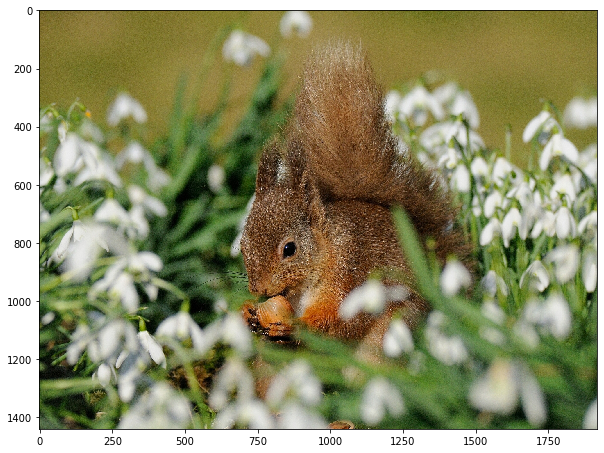

In [4]:
# load Image
image = plt.imread("hw3_img.jpg")/255.
#plot image
fig = plt.figure(figsize=(10,10))
plt.imshow(image)

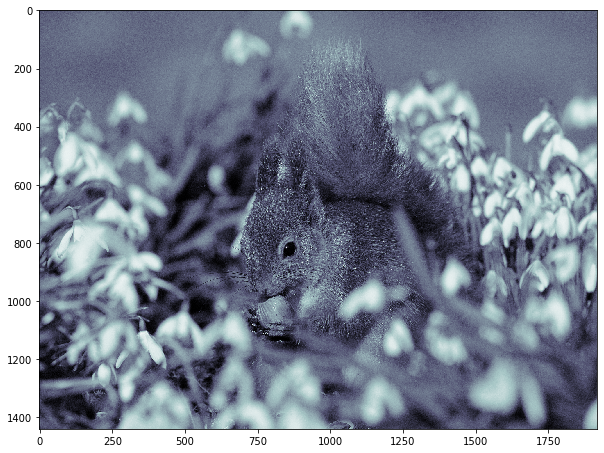

In [5]:
def rgb2gray(rgb):   
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

fig = plt.figure(figsize=(10, 10))
# plot several images
plt.imshow(rgb2gray(image), cmap=plt.cm.bone)

### 2.1 Image compression [20pts]  <span style="color:blue">**[P]**</span>

The SVD allows us to compress an image by throwing away the least important information.  The greater the singular values -> the greater the variance -> most information from the corresponding singular vector. SVD each matrix and get rid of the small singular values to compress the image. The loss of inforamtion is negligible as the difference is very difficult to be spotted. [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) follows the same process to elimate the small variance eigenvalues and their vectors.  With PCA, we center the data first by subtracting the mean. Each singular value tells us how much of the variance of a matrix (e.g. image) is captured in each component.  For example, the variance captured by the first component is $$\frac{\sigma_1}{\sum_{i=1}^n \sigma_i}$$ where $\sigma_i$ is the $i^{th}$ singular value. You need to finish the following functions to do SVD and then reconstruct the image by components.

In [6]:
from matplotlib import pyplot as plt
import numpy as np

class ImgCompression(object):
    def __init__(self):
        pass

    def svd(self, X): # [5pts]
        """
        Do SVD. You could use numpy SVD.
        Your function should be able to handle black and white
        images (N x D arrays) as well as color images (N x D x 3 arrays)
        In the image compression, we assume that each colum of the image is a feature. Image is the matrix X.
        Args:
            X: N x D array corresponding to an image (N x D x 3 if color image)
        Return:
            U: N x N (N x N x 3, for color images)
            S: min(N, D) x 1 (min(N, D) x 3, for color images)
            V: D x D (D x D x 3, for color images)
        """
        N,D = X.shape[0],X.shape[1]
        if X.ndim == 3:
            U = np.zeros((N,N,3))
            S = np.zeros((min(N,D),3))
            V = np.zeros((D,D,3))
            for i in range(3):
                U_temp,S_temp,V_temp = np.linalg.svd(X[:,:,i],compute_uv=True, full_matrices=True,hermitian=False)
                U[:,:,i] = U_temp
                S[:,i] = S_temp
                V[:,:,i] = V_temp
        else:
            U,S,V = np.linalg.svd(X,compute_uv=True,full_matrices=True, hermitian=False)
        return U,S,V

    def rebuild_svd(self, U, S, V, k): # [5pts]
        """
        Rebuild SVD by k componments.
        Args:
            U: N x N (N x N x 3, for color images)
            S: min(N, D) x 1 (min(N, D) x 3, for color images)
            V: D x D (D x D x 3, for color images)
            k: int corresponding to number of components
        Return:
            Xrebuild: N x D array of reconstructed image (N x D x 3 if color image)

        Hint: numpy.matmul may be helpful for reconstructing color images
        """
        
        N,D = U.shape[0],V.shape[0]
            
        
        if U.ndim == 3:
            Xrebuild = np.zeros((N,D,3))
            for i in range(3):
                U_temp = U[:,0:k,i]
                S_temp = S[:,i]
                S_temp = np.diag(S_temp[0:k])
                V_temp = V[0:k,:,i]
                Xrebuild_temp = U_temp@S_temp@V_temp
                Xrebuild[:,:,i] = Xrebuild_temp
        else:
            U_new = U[:,0:k]
            S_new = np.diag(S[0:k])
            V_new = V[0:k,:]
            Xrebuild = U_new@S_new@V_new

        return Xrebuild
          

    def compression_ratio(self, X, k): # [5pts]
        """
        Compute compression of an image: (num stored values in compressed)/(num stored values in original)
        Args:
          X: N x D array corresponding to an image (N x D x 3 if color image)
          k: int corresponding to number of components
        Return:
          compression_ratio: float of proportion of storage used by compressed image
        """
        N,D = X.shape[0],X.shape[1]
        compression_ratio = k/min(N,D)        
        return compression_ratio


    def recovered_variance_proportion(self, S, k): # [5pts]
        """
        Compute the proportion of the variance in the original matrix recovered by a rank-k approximation

        Args:
         S: min(N, D) x 1 (min(N, D) x 3 for color images) of singular values for the image
         k: int, rank of approximation
        Return:
         recovered_var: int (array of 3 ints for color image) corresponding to proportion of recovered variance
        """
        if S.ndim == 1:
            recovered_var = 0
            denom = np.sum(S**2)
            for i in range(k):
                recovered_var += ((S[i]**2)/denom)       
        
        elif S.shape[1] == 3:
            recovered_var = []
            for col in range(S.shape[1]):
                var_temp = 0
                denom = np.sum(S[:,col]**2)
                for i in range(k):
                    var_temp += (S[i,col]**2)/denom
                recovered_var.append(var_temp)
                    
        return recovered_var

### 2.2 Black and white [5 pts] <span style="color:green">**[W]**</span>
Use your implementation to generate a set of images compressed to different degrees. Include the images in your non-programming submission to the assignment.

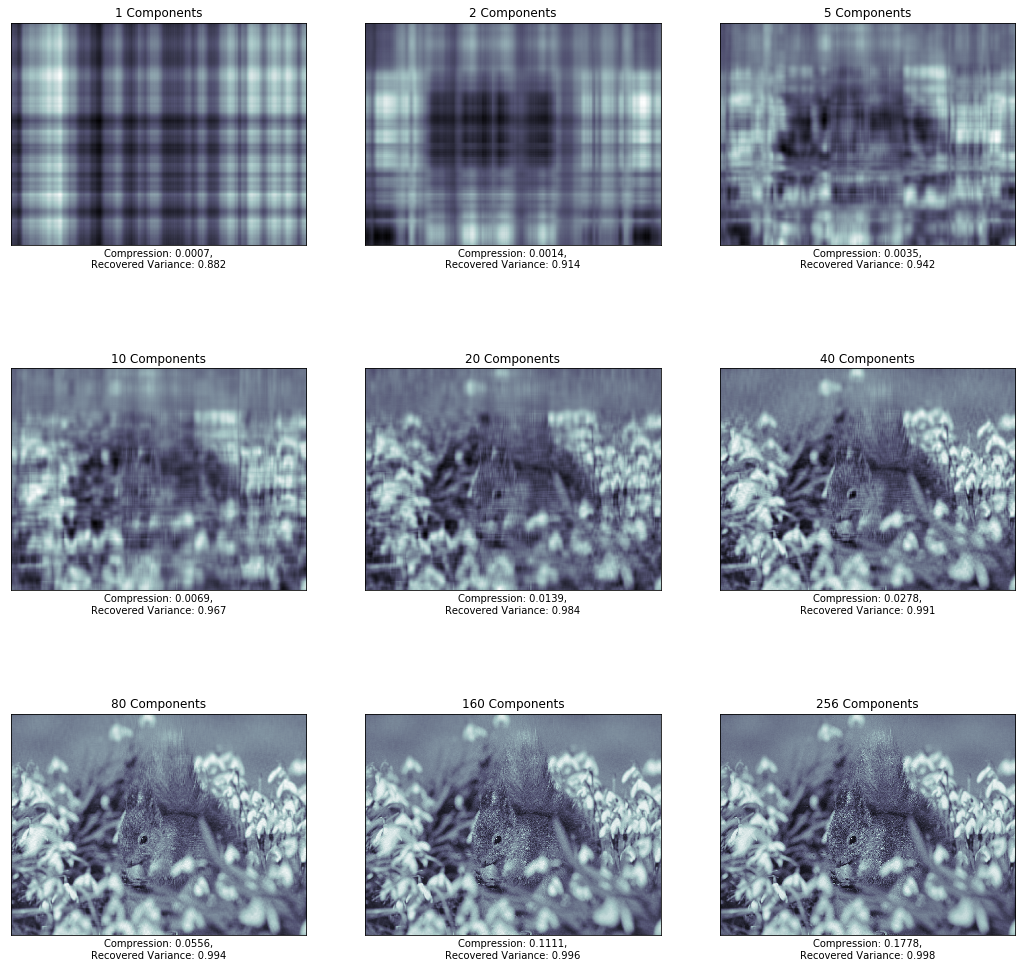

In [7]:
#helper do not need to change
imcompression = ImgCompression()
bw_image = rgb2gray(image)
U, S, V = imcompression.svd(bw_image)
component_num = [1,2,5,10,20,40,80,160,256]

fig = plt.figure(figsize=(18, 18))

# plot several images
i=0
for k in component_num:
    img_rebuild = imcompression.rebuild_svd(U, S, V, k)
    c = np.around(imcompression.compression_ratio(bw_image, k), 4)
    r = np.around(imcompression.recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img_rebuild, cmap=plt.cm.bone)
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {c},\nRecovered Variance: {r}")
    i = i+1

### 2.3 Color image [5 pts] <span style="color:green">**[W]**</span>
Use your implementation to generate a set of images compressed to different degrees. Include the images in your non-programming submission to the assignment.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


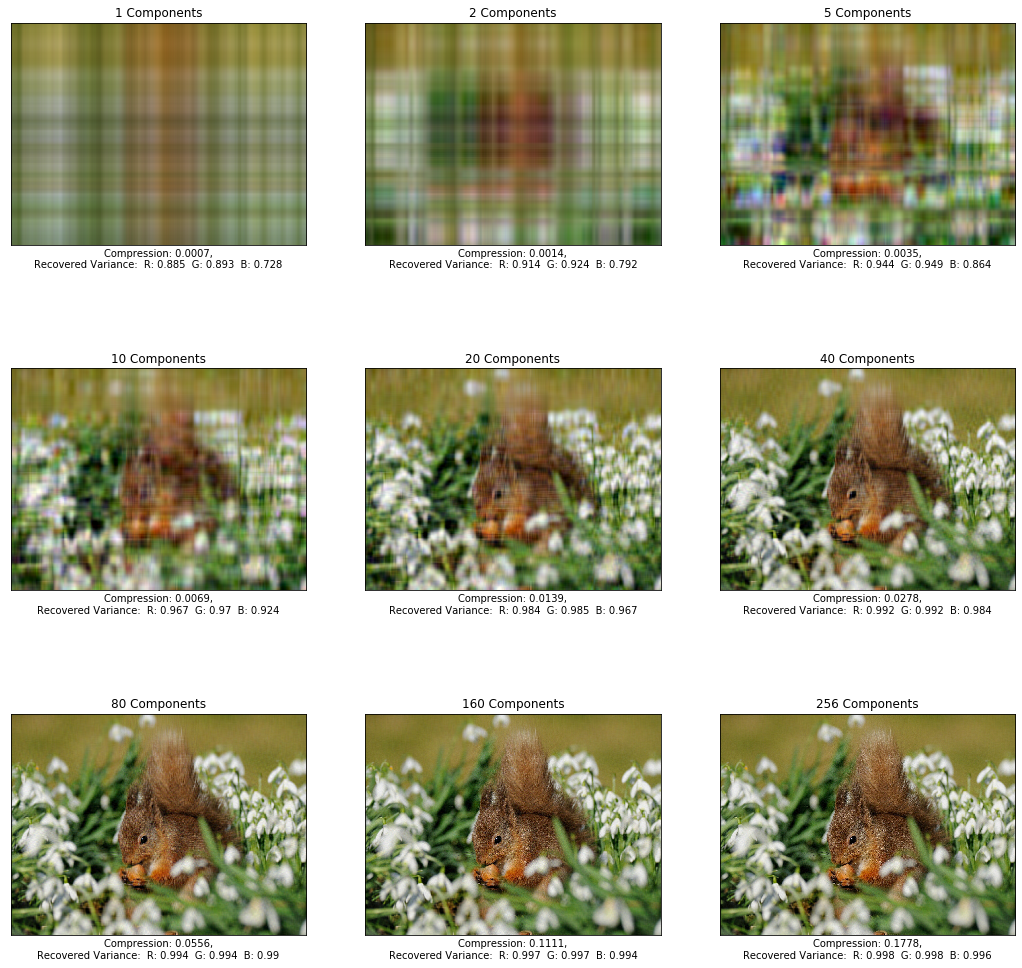

In [8]:
#helper do not need to change
imcompression = ImgCompression()
U, S, V = imcompression.svd(image)
component_num = [1,2,5,10,20,40,80,160,256]

fig = plt.figure(figsize=(18, 18))

# plot several images
i=0
for k in component_num:
    img_rebuild = imcompression.rebuild_svd(U, S, V, k)
    c = np.around(imcompression.compression_ratio(image, k), 4)
    r = np.around(imcompression.recovered_variance_proportion(S, k), 3)
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img_rebuild)
    ax.set_title(f"{k} Components")
    ax.set_xlabel(f"Compression: {np.around(c,4)},\nRecovered Variance:  R: {r[0]}  G: {r[1]}  B: {r[2]}")
    i = i+1

## 3 Polynomial regression and regularization [Undergrad: 55 pts + 20 Bonus pts | Grad: 75pts]

### 3.1 Regression and regularization implementations <span style="color:blue">**[P]**</span>
We have three methods to fit linear and ridge regression models: 1) close form; 2) gradient descent (GD); 3) Stochastic gradient descent (SGD). For undergraduate students, you are required to implement the closed form for linear regression and for ridge regression, the others 4 methods are bonus parts. For graduate students, you are required to implement all of them. We use the term weight in the following code. Weights and parameters ($\theta$) have the same meaning here. We used parameters ($\theta$) in the lecture slides.

In [1]:
import numpy as np
class Regression(object):    
    def __init__(self):
        pass
    
    def rmse(self, pred, label): # [5pts]
        '''
        This is the root mean square error.
        Args:
            pred: numpy array of length N x 1, the prediction of labels
            label: numpy array of length N x 1, the ground truth of labels
        Return:
            a float value
        '''
        rmse = np.sqrt(((pred-label)**2).mean())
        return rmse
    
    def construct_polynomial_feats(self, x, degree): # [5pts]
        """
        Args:
            x: numpy array of length N, the 1-D observations
            degree: the max polynomial degree
        Return:
            feat: numpy array of shape Nx(degree+1), remember to include 
            the bias term. feat is in the format of:
            [[1.0, x1, x1^2, x1^3, ....,],
             [1.0, x2, x2^2, x2^3, ....,],
             ......
            ]
        """
        x = x.reshape(-1,1)
        x_rep = np.repeat(x,degree+1,axis=1)
        deg_arr = np.arange(degree+1)
        feat = np.power(x_rep,deg_arr)
        return feat


    def predict(self, xtest, weight): # [5pts]
        """
        Args:
            xtest: NxD numpy array, where N is number 
                   of instances and D is the dimensionality of each 
                   instance
            weight: Dx1 numpy array, the weights of linear regression model
        Return:
            prediction: Nx1 numpy array, the predicted labels
        """
        prediction = xtest@weight
        return prediction

    # =================
    # LINEAR REGRESSION
    # Hints: in the fit function, use close form solution of the linear regression to get weights. 
    # For inverse, you can use numpy linear algebra function  
    # For the predict, you need to use linear combination of data points and their weights (y = theta0*1+theta1*X1+...)

    def linear_fit_closed(self, xtrain, ytrain): # [5pts]
        """
        Args:
            xtrain: N x D numpy array, where N is number of instances and D is the dimensionality of each instance
            ytrain: N x 1 numpy array, the true labels
        Return:
            weight: Dx1 numpy array, the weights of linear regression model
        """
        weight = np.linalg.inv(xtrain.T@xtrain)@xtrain.T@ytrain
        return weight

    def linear_fit_GD(self, xtrain, ytrain, epochs=5, learning_rate=0.001): # [5pts]
        """
        Args:
            xtrain: NxD numpy array, where N is number 
                    of instances and D is the dimensionality of each 
                    instance
            ytrain: Nx1 numpy array, the true labels
        Return:
            weight: Dx1 numpy array, the weights of linear regression model
        """
        N,D = xtrain.shape
        weight = np.zeros((D,1))
        for i in range(epochs):
            pred = xtrain.dot(weight)
            weight += (learning_rate/N)*(xtrain.T).dot((ytrain-pred))
            
        return weight

    def linear_fit_SGD(self, xtrain, ytrain, epochs=1000, learning_rate=0.001): # [5pts]
        """
        Args:
            xtrain: NxD numpy array, where N is number 
                    of instances and D is the dimensionality of each 
                    instance
            ytrain: Nx1 numpy array, the true labels
        Return:
            weight: Dx1 numpy array, the weights of linear regression model
        """
        N,D = xtrain.shape
        weight = np.zeros((D,1))
        it=0
        while it<=epochs:
            for i in range(N):
                pred = xtrain[i].dot(weight)                
                weight += (learning_rate*(xtrain[i])*(ytrain[i]-pred)[0]).reshape(-1,1)
            it += 1
            
        return weight
    # =================
    # RIDGE REGRESSION
        
    def ridge_fit_closed(self, xtrain, ytrain, c_lambda): # [5pts]
        """
        Args:
            xtrain: N x D numpy array, where N is number of instances and D is the dimensionality of each instance
            ytrain: N x 1 numpy array, the true labels
            c_lambda: floating number
        Return:
            weight: Dx1 numpy array, the weights of ridge regression model
        """
        N,D = xtrain.shape
        weights = np.linalg.inv(xtrain.T@xtrain+c_lambda*np.identity(D))@xtrain.T@ytrain
        return weights

        
    def ridge_fit_GD(self, xtrain, ytrain, c_lambda, epochs=500, learning_rate=1e-7): # [5pts]
        """
        Args:
            xtrain: NxD numpy array, where N is number 
                    of instances and D is the dimensionality of each 
                    instance
            ytrain: Nx1 numpy array, the true labels
            c_lambda: floating number
        Return:
            weight: Dx1 numpy array, the weights of linear regression model
        """
        N,D = xtrain.shape
        weight = np.zeros((D,1))
        
        for i in range(epochs):
            pred = xtrain.dot(weight)
            weight += (learning_rate/N)*((xtrain.T).dot((ytrain-pred))+c_lambda)
            
        return weight
        

    def ridge_fit_SGD(self, xtrain, ytrain, c_lambda, epochs=100, learning_rate=0.001): # [5pts]
        """
        Args:
            xtrain: NxD numpy array, where N is number 
                    of instances and D is the dimensionality of each 
                    instance
            ytrain: Nx1 numpy array, the true labels
        Return:
            weight: Dx1 numpy array, the weights of linear regression model
        """
        N,D = xtrain.shape
        weight = np.zeros((D,1))
        it=0
        while it<=epochs:
            for i in range(N):
                pred = xtrain[i].dot(weight)                
                weight += (learning_rate*((xtrain[i])*(ytrain[i]-pred)[0])).reshape(-1,1)
            it += 1
            weight += learning_rate*(c_lambda)
        return weight
    

    def ridge_cross_validation(self, X, y, kfold=10, c_lambda=100): # [8 pts]
        """
        Args:
            X: NxD numpy array, where N is number 
                    of instances and D is the dimensionality of each 
                    instance
            y: Nx1 numpy array, the true labels
            kfold: integer, size of the fold for the data split
            c_lambda: floating number
        Return:
            mean_error: the mean of the RMSE for each fold
        """
        N,D = X.shape
        X_folds = np.array_split(X,kfold,axis=0)
        y_folds = np.array_split(y,kfold,axis=0)
        rmse_vals = []
        
        for i in range(kfold):
            Xtrain = [x for ind,x in enumerate(X_folds) if ind != i]
            Xtrain = np.vstack(Xtrain)
            Xtest = [x for ind,x in enumerate(X_folds) if ind == i]
            Xtest = np.vstack(Xtest)   
            ytrain = [y for ind,y in enumerate(y_folds) if ind != i]
            ytrain = np.vstack(ytrain)            
            ytest = y_folds[i]  

            weights = self.ridge_fit_closed(Xtrain,ytrain,c_lambda)
            pred = self.predict(Xtest,weights)

            rmse_res = self.rmse(pred,ytest)
            rmse_vals.append(rmse_res)
        mean_rmse = np.mean(rmse_vals)
        return mean_rmse

### 3.2 About RMSE [5pts] <span style="color:green">**[W]**</span>
Do you know whether this RMSE is good or not? If you don't know, we could normalize our labels between 0 and 1. After normalization, what does it mean when RMSE = 1? 

**Hint**: think of the way that you can enforce your RMSE = 1. Note that you can not change the actual labels to make RMSE = 1.

### Analysis:
The RMSE can be expressed as :
$$ \sqrt{\frac{(y_{pred}-y_{act})^{2}}{N_{obs}}} $$
where $y_{pred}$, $y_{act}$ and $N_{obs}$ are the predicted target, actual value and number of observations.
Setting the above expression to $1$, we get:
$$(y_{pred}-y_{act})^{2} = N_{obs}^{2} $$
The above condition is definitely achieved when the error between each predicted point and observed point is 1 (i.e. if the actual label is 0.5, predicting either -0.5 or 1.5). In the classification case (either 0 or 1 as possible outputs) an RMSE of 1 indicates complete misclassification; in the regression setting, an RMSE of 1 for normalized data is quite poor performance. 

### 3.3 Testing: general functions and linear regression [5 pts] <span style="color:green">**[W]**</span>

Let's first construct a dataset for polynomial regression.

In this case, we construct the polynomial features up to degree 5, where the groundtruth function is just a linear function (i.e., only require polynomial features up to degree 1).

In [10]:
#helper do not need to change
def plot_curve(x, y, curve_type='.', color='b', lw=2):
    plt.plot(x, y, curve_type, color=color, linewidth=lw)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

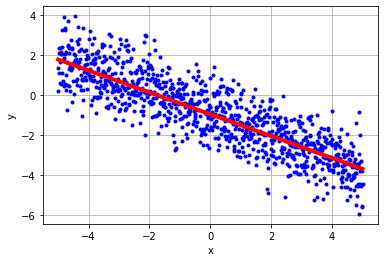

In [11]:
#helper, do not need to change
POLY_DEGREE = 5
NUM_OBS = 1000

rng = np.random.RandomState(seed=4)

true_weight = -rng.rand(POLY_DEGREE + 1, 1)
true_weight[2:, :] = 0
x_all = np.linspace(-5, 5, NUM_OBS)
reg = Regression()
x_all_feat = reg.construct_polynomial_feats(x_all, POLY_DEGREE)
y_all = np.dot(x_all_feat, true_weight) + rng.randn(x_all_feat.shape[0], 1) # in the second term, we add noise to data
# Note that here we try to produce y_all as our training data
plot_curve(x_all, y_all) # Data with noise that we are going to predict
plot_curve(x_all, np.dot(x_all_feat, true_weight), curve_type='-', color='r', lw=4) # the groundtruth information

indices = rng.permutation(NUM_OBS)

In the figure above, the red curve is the true fuction we want to learn, while the blue dots are the noisy observations. The observations are generated by  $Y=X\theta+σ$ , where  σ∼N(0,1)  are i.i.d. generated noise.

Now let's split the data into two parts, namely the training set and test set. The red dots are for training, while the blue dots are for testing.

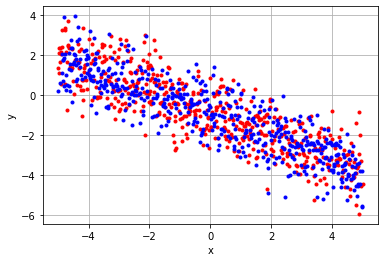

In [12]:
train_indices = indices[:NUM_OBS//2]
test_indices = indices[NUM_OBS//2:]

plot_curve(x_all[train_indices], y_all[train_indices], color='r')
plot_curve(x_all[test_indices], y_all[test_indices], color='b')

Now let's first train using the entire training set, and see how we performs on the test set and how the learned function look like.

In [13]:
#helper, do not need to change
weight = reg.linear_fit_closed(x_all_feat[train_indices], y_all[train_indices])
y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

test rmse: 0.9222


In [14]:
weight = reg.linear_fit_GD(x_all_feat[train_indices], y_all[train_indices], epochs=5000, learning_rate=1e-7)
y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

test rmse: 1.4478


And what if we just use the first 10 observations to train? 

In [15]:
sub_train = train_indices[:10]
weight = reg.linear_fit_closed(x_all_feat[sub_train], y_all[sub_train])
y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

test rmse: 2.1910


Did you see a worse performance? Let's take a closer look at what we have learned.

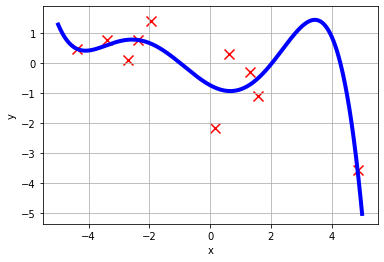

In [16]:
#helper, do not need to change
y_pred = reg.predict(x_all_feat, weight)
plot_curve(x_all, y_pred, curve_type='-', color='b', lw=4)
plt.scatter(x_all[sub_train], y_all[sub_train], s=100, c='r', marker='x')

y_test_pred = reg.predict(x_all_feat[test_indices], weight)

### 3.4 Testing: ridge regression [5 pts]

Now let's try ridge regression. Similarly, undergraduate students need to implement the closed form, and graduate students need to implement all the three methods. We will call the prediction function from linear regression part.

Again, let's see what we have learned. You only need to run the cell corresponding to your specific implementation.

(10, 6)
(10, 1)
test rmse: 1.4610


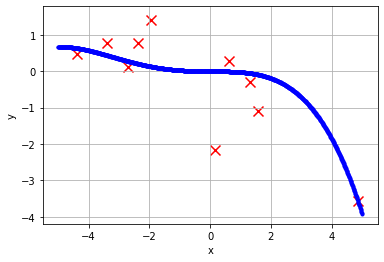

In [17]:
sub_train = train_indices[:10]
print(x_all_feat[sub_train].shape)
print(y_all[sub_train].shape)
weight = reg.ridge_fit_closed(x_all_feat[sub_train], y_all[sub_train], c_lambda=1000)

y_pred = reg.predict(x_all_feat, weight)
plot_curve(x_all, y_pred)
plt.scatter(x_all[sub_train], y_all[sub_train], s=100, c='r', marker='x')

y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

test rmse: 1.7635


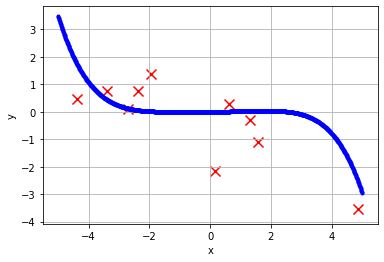

In [18]:
sub_train = train_indices[:10]
weight = reg.ridge_fit_GD(x_all_feat[sub_train], y_all[sub_train], c_lambda=1000, learning_rate=1e-7)

y_pred = reg.predict(x_all_feat, weight)
plot_curve(x_all, y_pred)
plt.scatter(x_all[sub_train], y_all[sub_train], s=100, c='r', marker='x')

y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

test rmse: 1.8152


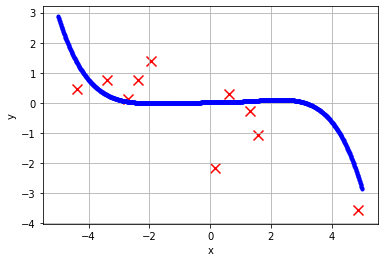

In [19]:
sub_train = train_indices[:10]
weight = reg.ridge_fit_SGD(x_all_feat[sub_train], y_all[sub_train], c_lambda=1000, learning_rate=1e-7)

y_pred = reg.predict(x_all_feat, weight)
plot_curve(x_all, y_pred)
plt.scatter(x_all[sub_train], y_all[sub_train], s=100, c='r', marker='x')

y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)

### 3.5 Cross validation [7 pts] <span style="color:green">**[W]**</span>
Let's use Cross Validation to find the best value for c_lambda in ridge regression.

In [20]:
# We provided 6 possible values for lambda, and you will use them in cross validation.
# For cross validation, use 10-fold method and only use it for your training data (you already have the train_indices to get training data).
# For the training data, split them in 10 folds which means that use 10 percent of training data for test and 90 percent for training.
# At the end for each lambda, you have caluclated 10 rmse and get the mean value of that.
# That's it. Pick up the lambda with the lowest mean value of rmse. 
# Hint: np.concatenate is your friend.
best_lambda = None
best_error = None
kfold = 10
lambda_list = [0, 0.1, 1, 5, 10, 100, 1000]
for lm in lambda_list:
    err = reg.ridge_cross_validation(x_all_feat[train_indices], y_all[train_indices], kfold, lm)
    print('lambda: %.2f' % lm, 'error: %.6f'% err)
    if best_error is None or err < best_error:
        best_error = err
        best_lambda = lm

print('best_lambda: %.2f' % best_lambda)
weight = reg.ridge_fit_closed(x_all_feat[train_indices], y_all[train_indices], c_lambda=10)
y_test_pred = reg.predict(x_all_feat[test_indices], weight)
test_rmse = reg.rmse(y_test_pred, y_all[test_indices])
print('test rmse: %.4f' % test_rmse)  

lambda: 0.00 error: 0.999078
lambda: 0.10 error: 0.999079
lambda: 1.00 error: 0.999098
lambda: 5.00 error: 0.999341
lambda: 10.00 error: 0.999962
lambda: 100.00 error: 1.029726
lambda: 1000.00 error: 1.135153
best_lambda: 0.00
test rmse: 0.9223


## 4 Understanding PCA [20 pts] <span style="color:green">**[W]**</span>

In this problem, we will investigate how PCA can be used to improve features for regression and classification tasks and how the data itself affects the behavior of PCA. Implement PCA in the below cell. Note that you will not submit your code for this problem to the autograder.

### 4.1 Intrinsic Dimensionality [10 pts] <span style="color:green">**[W]**</span>
Assume a dataset is composed of N datapoints, each of which has D features with D < N.  The *dimension* of our data would be $D$. It is possible, however, that many of these dimensions contain redundant information.  The *intrinsic dimensionality* is the number of dimensions we need to reconstruct our data with high fidelity.  For our purposes, we will define the intrinsic dimension as the number of principal components needed to reconstruct 99% of the variation within our data.  

We define a set of features as linearly independent if we cannot construct one out of a linear combination of the others. The number of linearly independent features is the number of nonzero principal components (where we define 0 is anything less than $10^{-11}$ due to floating point error). Zero principal components mean that we can not find any weights to linearly combine features in order to create an indenpendent feature. Thus, our algorithm will assign 0 to these weights.

In [21]:
def pca(X):
    """
    Decompose dataset into principal components. 
    You may use your SVD function from the previous part in your implementation.

    Args: 
        X: N x D array corresponding to a dataset, in which N is the number of points and D is the number of features
    Return:
        U: N x N 
        S: min(N, D) x 1 
        V: D x D
    """
    X = X.astype(float)
    X = (X-X.mean(axis=0))#/(np.std(X,axis=0))

    U,S,V = np.linalg.svd(X,compute_uv=True,full_matrices=True, hermitian=False)
    S = S.reshape(-1,1)
    
    max_abs_cols = np.argmax(np.abs(U), axis=0)
    signs = np.sign(U[max_abs_cols, range(U.shape[1])])
    U *= signs

    return U,S,V

def intrinsic_dimension(S, recovered_variance=.99):
    """
    Find the number of principal components necessary to recover given proportion of variance

    Args: 
        S: 1-d array corresponding to the singular values of a dataset

        recovered_variance: float in [0,1].  Minimum amount of variance 
            to recover from given principal components
    Return:
        dim: int, the number of principal components necessary to recover 
            the given proportion of the variance
    """
    recvar = 0.0
    denom = (S**2).sum()
    for dim in range(len(S)):
        recvar += (S[dim]**2)/denom
        if recvar>=recovered_variance:
            break    
    return dim+1
        
    
def num_linearly_ind_features(S, eps=1e-11):
    """
    Find the number of linearly independent features in dataset

    Args: 
        S: 1-d array corresponding to the singular values of a dataset
    Return:
        dim: int, the number of linearly independent dimensions in our data
    """
    dim = np.count_nonzero(S)
    return int(dim)

def apply_PCA(X, retained_variance=0.99):
    """
    Apply the functions you just implemented
    Args: 
        X: N x D array corresponding to a dataset, in which N is the number of points and D is the number of features
        retained variance: floating number
    Return:
        (X_new, num_linearly_ind_features, intrinsic_dimension): The X projection on the new feature space, the number of linearly independent dimensions in our data, the intrinsic dimension
    """
    N,D = X.shape
    U,S,V = pca(X)
    
    S_square = np.diag(np.append(S,np.zeros(abs(D-N))))

    X_new = (U@S_square)[:,0:D]
    linearly_ind_features = num_linearly_ind_features(S.ravel())
    intrinsic_dim = intrinsic_dimension(S)
    return (X_new, linearly_ind_features, intrinsic_dim)

PCA is used to transform multivariate data tables into smaller sets so as to observe the hidden trends and variations in the data. Here you will visualize two datasets (iris and wine) using PCA. Use the above implementation of PCA and reduce the datasets such that they contain only two features. Make 2-D scatter plots of the data points using these features. Make sure to differentiate the data points according to their true labels. The datasets have already been loaded for you. In addition, return the retained variance obtained from the reduced features.

In [22]:
def visualize(X,y):
    """
    Args:
    xtrain: NxD numpy array, where N is number 
          of instances and D is the dimensionality of each 
          instance
    ytrain: numpy array (N,), the true labels
  
    Return:
    retained variance: scalar
    
    Plot:
    scatter plot with the datapoints projected onto new feature space
    """
    (X_new, linearly_ind_features, intrinsic_dim) = apply_PCA(X)
    
    U,S,V = pca(X)
    retained_variance = (S[0]**2+S[1]**2)/((S**2).sum())
   
    reduced_pts = X_new[:,0:2]

    labels = []
    zero_labels = np.argwhere(y==0).ravel()
    one_labels = np.argwhere(y==1).ravel()
    two_labels = np.argwhere(y==2).ravel()
    
    labels.append(zero_labels)
    labels.append(one_labels)
    labels.append(two_labels)
    cols = ["r", "b", "g"]
    for i in range(3):
        col_x = reduced_pts[:,0][labels[i]]
        col_y = reduced_pts[:,1][labels[i]]
        plt.scatter(col_x,col_y,color=cols[i])
    plt.show()
    return retained_variance[0]


(150,)


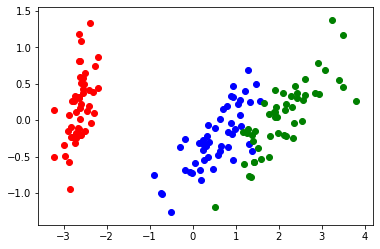

Retained variance for iris dataset  0.977685206318795


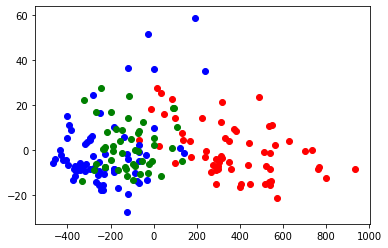

Retained variance for wine dataset  0.9998271461166034


In [23]:
# use PCA for visualization of iris and wine data
data=load_iris(return_X_y=True)
X=data[0]
y=data[1]
print(y.shape)
retained_variance_for_iris=visualize(X,y)
print("Retained variance for iris dataset ",retained_variance_for_iris)

data=load_wine(return_X_y=True)
X=data[0]
y=data[1]
retained_variance_for_wine=visualize(X,y)
print("Retained variance for wine dataset ",retained_variance_for_wine)

Now you will use PCA on an actual real-world dataset. Implement feature reduction on the dataset using PCA with 99% retained variance. Use it to obtain the reduced features. On the reduced dataset, use linear regression and calculate the rmse values on test data. Your are encouraged to experiment with hyperparameters like the learning rate, number of epochs and regularization strength. Compare these results with those obtained by implementing regression on the unreduced dataset. 

In [24]:
# helper
def apply_regression(X_train,y_train,X_test):
    weight = reg.ridge_fit_closed(X_train, y_train, c_lambda=1600)
    y_pred = reg.predict(X_test, weight)
    return y_pred

In [25]:
#load the dataset 
data=np.load("data.npy",allow_pickle=True)
# separate the data
X=data[:,:-1]
y=data[:,-1]
X_PCA, ind_features, intrinsic_dimensions = apply_PCA(X)
print("data shape with PCA ",X_PCA.shape)
print("Number of independent features ",ind_features)
print("Number of intrinsic components ",intrinsic_dimensions)

#get training and testing data 
X_train=X_PCA[:int(0.8*len(data)),:]
y_train=y[:int(0.8*len(data))].reshape(-1,1)
X_test=X_PCA[int(0.8*len(data)):]
y_test=y[int(0.8*len(data)):].reshape(-1,1)

# use Ridge Regression for getting predicted labels
y_pred=apply_regression(X_train,y_train,X_test)

#calculate RMSE 
rmse_score = reg.rmse(y_pred, y_test)
print("rmse score with PCA",rmse_score)

data shape with PCA  (1460, 34)
Number of independent features  34
Number of intrinsic components  3
rmse score with PCA 306374.2910736947


In [26]:
# Ridge regression without PCA
X_train=X[:int(0.8*len(data)),:]
y_train=y[:int(0.8*len(data))].reshape(-1,1)
X_test=X[int(0.8*len(data)):]
y_test=y[int(0.8*len(data)):].reshape(-1,1)

#use Ridge Regression for getting predicted labels
y_pred=apply_regression(X_train,y_train,X_test)

#calculate RMSE 
rmse_score = reg.rmse(y_pred, y_test)
print("rmse score without PCA",rmse_score)

rmse score without PCA 52357.77579653398


### 4.2 Feature Scaling [10 pts] <span style="color:green">**[W]**</span>

Principal component analysis is not agnostic to the scale of your features.  Measuring a feature with different units can change your principal components.

For this problem, randomly choose one column in each of the above datasets and multiply it by 1000.  For each of the datasets, answer the following:
1. How does this change the distribution of variance among the first 10 components?  
2. How does this change the first principal component of the data?
3. How does this affect the number of linearly independent components and intrinsic dimensionality?  Why?

It may be helpful to plot the variance captured by each component in a scree plot (see function below) and to make a bar plot of the absolute value of each feature in the first principal component. Hint: Exploring the imported datasets (i.e. Boston, Diabetes, Digits, etc.) may help you understand the answers to these questions.

In [27]:
# helper fuctions
def randomly_perturb_data(data, multiplier=1000):
    """
    Multiply a random column in data by multiplier
    
    Inputs:
        data: N*D numpy array of features
        multiplier: multiplier by which to perturb a random column in data
        
    Returns:
        perturbed_data: Data with random column multiplied by multiplier
    """
    #np.random.seed(2)
    i = np.random.randint(data.shape[1])
    copy = data.copy()
    copy[:,i] *= multiplier
    return copy
   
    
def scree_plot(S, n_components=10):
    """
    Plot proportion of variance contained in each individual component
    """
    plt.plot(range(1, n_components+1), (S/S.sum())[:n_components])
    plt.ylabel("Proportion of Variance")
    plt.xlabel("Component Number")
    plt.title("PCA Scree Plot")
    plt.show()
    
def plot_component_vector(V):
    v = V[:,0]
    print(np.abs(v))
    plt.bar(range(1, len(v)+1), np.abs(v))
    plt.show()

In [28]:
data=np.load("data.npy",allow_pickle=True)
# separate the data
X=data[:,:-1]
y=data[:,-1]
X_pert = randomly_perturb_data(X)

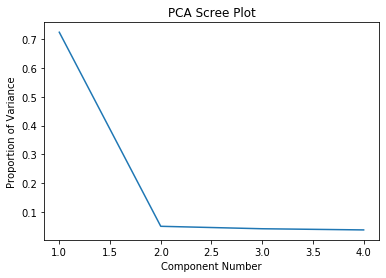

[1.40465845e-03 1.10465105e-02 6.88715734e-03 2.16798677e-02
 2.00849163e-02 9.98960322e-01 2.46262124e-02 1.58356753e-02
 8.02559688e-04 9.31934661e-03 1.34870514e-04 1.14593439e-03
 4.98460054e-03 3.11296953e-03 5.02551664e-03 3.53569711e-03
 3.51585468e-03 1.62193124e-03 2.30485919e-04 1.38918439e-04
 3.18259935e-05 8.58251909e-05 7.29957407e-05 6.89228982e-05
 6.05818068e-06 5.60913737e-06 1.46215507e-05 1.05754902e-05
 1.71470438e-05 7.61101851e-06 7.68549251e-06 2.08697411e-05
 0.00000000e+00 0.00000000e+00]


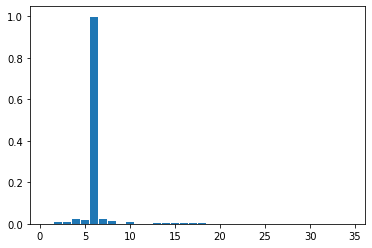

Number of linearly independent features:  34
Intrinsic dimension:  3


In [29]:
#Case 1: Without perturbation
U,S,V = pca(X)
scree_plot(S, n_components=4)
plot_component_vector(V)
X_new, linearly_ind_features, intrinsic_dim = apply_PCA(X,retained_variance=1)
print('Number of linearly independent features: ',linearly_ind_features)
print('Intrinsic dimension: ',intrinsic_dim)

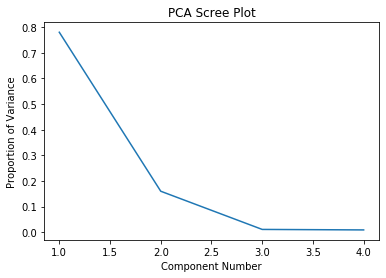

[3.83602648e-04 1.39526812e-03 1.28531154e-02 1.50344562e-02
 2.28149477e-02 2.13101397e-02 9.98738856e-01 2.81990294e-02
 1.45101164e-02 3.83258937e-04 9.80132406e-03 6.88586745e-04
 2.77597530e-04 4.96130196e-04 4.96247861e-03 3.26655971e-03
 3.50629869e-03 1.51451850e-03 2.42528147e-04 1.38941455e-04
 3.18288963e-05 8.58224991e-05 7.29963119e-05 6.89240215e-05
 6.05785688e-06 5.60890997e-06 1.46215327e-05 1.05754303e-05
 1.71471500e-05 7.61104030e-06 7.68549258e-06 2.08697194e-05
 0.00000000e+00 0.00000000e+00]


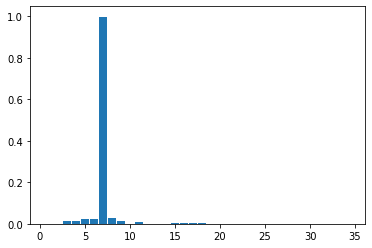

Number of linearly independent features:  34
Intrinsic dimension:  2


In [30]:
#Case 2: With perturbation
U_pert,S_pert,V_pert = pca(X_pert)
scree_plot(S_pert, n_components=4)
plot_component_vector(V_pert)
X_new, linearly_ind_features, intrinsic_dim = apply_PCA(X_pert,retained_variance=1)
print('Number of linearly independent features: ',linearly_ind_features)
print('Intrinsic dimension: ',intrinsic_dim)

### Analysis

Based on the above plots, it becomes clear that perturbing a random column (i.e. multiplying by 1000) indeed affects the PCA representation of it. Specifically,
1. The distribution of variance becomes more heavily skewed toward the first principle component (and observes a sharper decline) in the case of the perturbed data. This can be explained due to the much larger magnitude of a single column (which is thus presumed by PCA to contain more "information" or variance, even though it is just on a larger scale).
2. The magnitude of the first principle component also drastically decreases.
3. As expected, the number of linearly independent dimensions stays the same, since multiplying a column by a constant number does not alter the rank of a matrix. However, the number of intrinsic dimensions is reduced to just 1 on perturbation, because almost all the variance is captured in just the first principle component (again, because of the extraordinarily large magnitude of a single component).

## 5 Manifold learning [Bonus for everyone][30 pts]

While PCA is wonderful tool for dimensionality reduction it does not work very well when dealing with non-linear relationships between features. Manifold learning is a class of algorithms that can be used to reduce dimensions in complex high-dimensional datasets. While a number of methods have been proposed to perform this type of operation, we will focus on Isomap. Isomap has been shown to be sensitive to data noise amongst other issues, however it has been shown to perform reasonably well for real world data. The algorithm consists of two main steps: first computing a manifold distance matrix, followed by classical mutidimensional scaling. You will be creating your implementation of Isomap. In order to do so, you must read the original paper ["A Global Geometric Framework for Nonlinear Dimensionality Reduction"](http://web.mit.edu/cocosci/Papers/sci_reprint.pdf) by Tenenbaum et al. (2000), which outlines the method. You are also encouraged to read this [general survey of manifold learning](https://cseweb.ucsd.edu/~lcayton/resexam.pdf) by Cayton (2005), where the original algorithm is further explained in a more detailed yet simplified fashion.

### 5.1 Implementation [23 pts] <span style="color:blue">**[P]**</span>

In [31]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import floyd_warshall

class Isomap(object):
    def __init__(self): # No need to implement
        pass
    
    def pairwise_dist(self, x, y): # [3 pts]
        """
        Args:
            x: N x D numpy array
            y: M x D numpy array
        Return:
                dist: N x M array, where dist2[i, j] is the euclidean distance between 
                x[i, :] and y[j, :]
        """
        dist = np.linalg.norm(x[:,None]-y,axis=2)       
        return dist
    
    def manifold_distance_matrix(self, x, K): # [10 pts]
        """
        Args:
            x: N x D numpy array
        Return:
            dist_matrix: N x N numpy array, where dist_matrix[i, j] is the euclidean distance between points if j is in the neighborhood N(i)
            or comp_adj = shortest path distance if j is not in the neighborhood N(i).
        Hint: After creating your k-nearest weighted neighbors adjacency matrix, you can convert it to a sparse graph
        object csr_matrix (https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html) and utilize
        the pre-built Floyd-Warshall algorithm (https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.floyd_warshall.html)
        to compute the manifold distance matrix.
        """

        N = x.shape[0]
        dist_matrix = np.ones((N, N))*np.inf
        for i in range(N):
            dis = np.linalg.norm(x - np.tile(x[i],(len(x),1)),axis=1)
            order = np.argsort(dis,axis=-1)
            dis = np.sort(dis)
            dist = dis[1:K + 1]
            order = order[1:K + 1]
            dist_matrix[i, order] = dist
            dist_matrix[order, i] = dist
        
        np.fill_diagonal(dist_matrix,0)        
        dist_matrix = csr_matrix(dist_matrix)
        dist_matrix = floyd_warshall(dist_matrix)
        return dist_matrix
    
    def multidimensional_scaling(self, dist_matrix, d): # [10 pts]
        """
        Args:
            dist_matrix: N x N numpy array, the manifold distance matrix
            d: integer, size of the new reduced feature space 
        Return:
            S: N x d numpy array, X embedding into new feature space.
        """
        N = len(dist_matrix)
        S = np.zeros((N,d))
        eVal,eVect = np.linalg.eig(dist_matrix)
        idx = eVal.argsort()[::-1]
        eVal = eVal[idx]
        eVect = eVect[:,idx]
        
        eVect = eVect[:,0:d]
        eVal = np.diag(eVal[0:d])
        
        S = eVect@np.sqrt(eVal)
        return S

    # you do not need to change this
    def __call__(self, data, K, d):
        # get the manifold distance matrix
        W = self.manifold_distance_matrix(data, K)
        # compute the multidimensional scaling embedding
        emb_X = self.multidimensional_scaling(W, d)
        return emb_X

### 5.2 Examples for different datasets [7pts] <span style="color:green">**[W]**</span>
Apply your implementation of Isomap for some of the datasets (e.g. MNIST and Iris). Discuss how the new embedding compares to PCA.

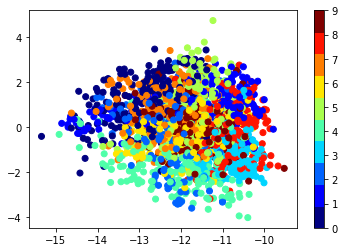

In [32]:
# example MNIST data
mnist = load_digits()
proj = Isomap()(mnist.data, 10, 2)
plt.scatter(proj[:, 0], proj[:, 1], c=mnist.target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))